In [58]:
import os
os.listdir('../../data/kaggle-histopathologic-cancer-detection/data/')

['test', 'sample_submission.csv', 'train', 'train_labels.csv']

In [59]:
base_dir = '../../data/kaggle-histopathologic-cancer-detection/data/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

print('Length of train_dir:', len(os.listdir(train_dir)))
print('Length of test_dir:', len(os.listdir(test_dir)))

Length of train_dir: 220025
Length of test_dir: 57458


In [60]:
import pandas as pd

labels = pd.read_csv(os.path.join(base_dir, 'train_labels.csv'))
print('labels_csv shape:', labels.shape)
print('Unique labels:', labels.label.unique())

labels_csv shape: (220025, 2)
Unique labels: [0 1]


The label values we have are 0 and 1

A **1** indicates that there is at least one pixel of tumor tissue exists in the center 32x32 region of the input image

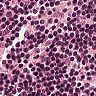

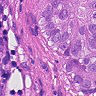

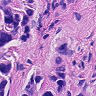

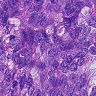

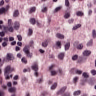

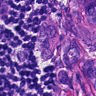

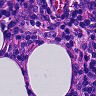

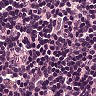

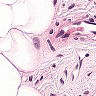

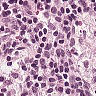

In [71]:
from IPython.display import display
from PIL import Image
import random

# Choose 10 random images from train_dir
random_images = random.choices(os.listdir(train_dir), k=10)

for random_image in random_images:
    image = Image.open(os.path.join(train_dir, random_image))
    display(image)

In [62]:
labels.label.value_counts()

0    130908
1     89117
Name: label, dtype: int64

We have an uneven amount of images for each class, we should balance these out to make classification easier.

In [63]:
labels_0 = labels[labels.label == 0].sample(89000)
labels_0.label.value_counts()

0    89000
Name: label, dtype: int64

We successfully created a Dataframe containing 89000 labels for images with no cancer tissue present. Let's do the same for the cancer-tissue-present images.

In [64]:
labels_1 = labels[labels.label == 1].sample(89000)
labels_1.label.value_counts()

1    89000
Name: label, dtype: int64

In [69]:
labels = pd.concat((labels_1, labels_0)).sample(frac=1)
labels.label.value_counts()

1    89000
0    89000
Name: label, dtype: int64

1    89000
0    89000
Name: label, dtype: int64